<a href="https://colab.research.google.com/github/marijnwolf/marijnwolf/blob/master/Week_2_hand_in_Marijn_Wolf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this document I will be looking at at 2 exoplanets around star WASP 99 and WASP 130. Results (graphs and image) are shown right underneath here. The code used is put below the results!

---



The goal for this week's practical is to utilize the notebooks mentioned and obtain light curve plots of at least two transiting exoplanets and/or some interesting field star (akin to the variable or eclipsing binary examples)...but of stars that are not utilized in any of the examples provided.

---



### Light curve for WASP 99-b 

(TIC 166836920) 
(TOI 267.01) 
(https://exofop.ipac.caltech.edu/tess/target.php?id=166836920) Dates; 09/20/18-10/18/18

---
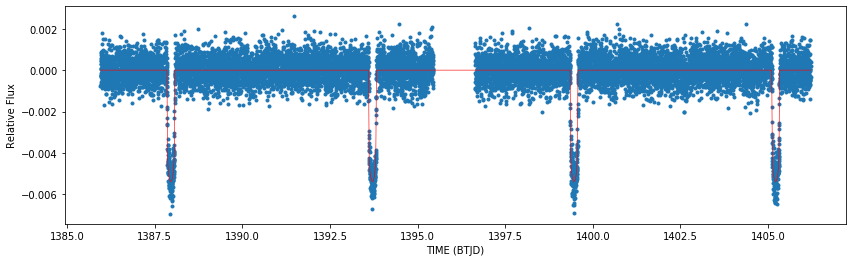

Bokeh light curve : https://colab.research.google.com/drive/1-sD5LjNgcCL1hkfOfRzzKJo-gU6UFizZ#scrollTo=o_p1EmzX2zah




### Light curve, Bokeh phased light curve & First image for** WASP 130-b   **



(TIC 243200602)  
(https://exofop.ipac.caltech.edu/tess/target.php?toi=826.01)
 Dates; 04/22/19-05/21/19
 

---

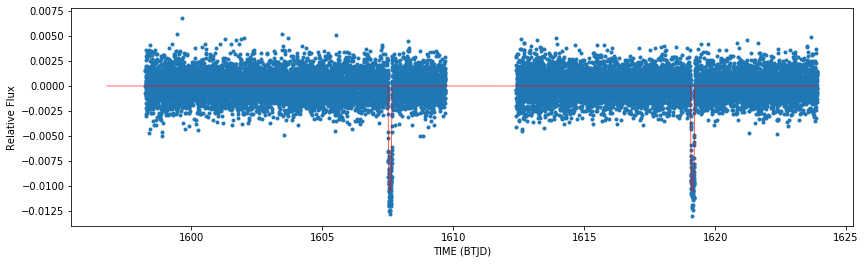
---

Bokeh phased light curve; https://colab.research.google.com/drive/1-sD5LjNgcCL1hkfOfRzzKJo-gU6UFizZ#scrollTo=L0U0Etin7L_n

First Image of the Time Series: 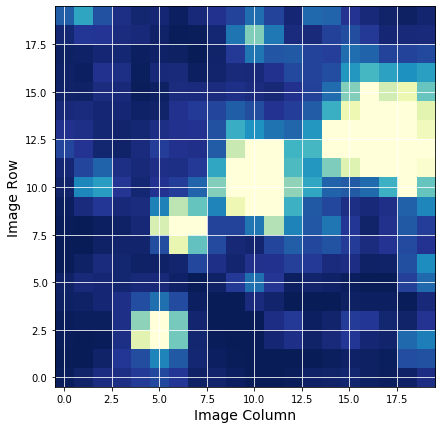





Code that was used to obtain the light curve:

First WASP (Wide Angle Search for Planets) 99-b

In [0]:
import numpy as np
import requests
import matplotlib.pyplot as plt
import pandas as p
from IPython.display import display, HTML

%matplotlib inline

planeturl = "https://exo.mast.stsci.edu/api/v0.1/exoplanets/"
dvurl = "https://exo.mast.stsci.edu/api/v0.1/dvdata/tess/"
header={}


In [75]:
planet_name = "WASP-99 b"

url = planeturl + "/identifiers/"

myparams = {"name":planet_name}

r = requests.get(url = url, params = myparams, headers = header)
print(r.headers.get('content-type'))

application/json; charset=UTF-8


In [76]:
planet_names = r.json()
ticid = planet_names['tessID']
tce = planet_names['tessTCE']
planet_names

{'canonicalName': 'WASP-99 b',
 'dec': -50.007999999788076,
 'keplerID': None,
 'keplerTCE': None,
 'planetNames': ['CPD-50 364 b',
  'CD-50 777 b',
  'PPM 332040 b',
  '2MASS 02393544-5000288 b',
  'SAO 232849 b',
  'GSC 08056-00948 b',
  '1SWASP J023935.44-500028.8 b',
  '2MASS J02393544-5000288 b',
  'TYC 8056-948-1 b',
  'WASP-99 b',
  'Gaia DR1 4745660479479743488 b',
  'CPC 0 1262 b'],
 'ra': 39.89766666094461,
 'starName': 'WASP-99',
 'tessID': 166836920,
 'tessTCE': 'TCE_1'}

In [77]:
url = planeturl + planet_name + "/properties/"

r = requests.get(url = url, headers = header)

planet_prop = r.json()

print("Catalog 1: " + planet_prop[0]['catalog_name'])
print("Catalog 2: " + planet_prop[1]['catalog_name'])
planet_prop[0].keys()

print("WASP-18 b Properties")
print("Stellar Mass %f %s" % (planet_prop[0]['Ms'], planet_prop[0]['Ms_unit'] ) )
print("Planet Mass %f %s" % (planet_prop[0]['Mp'], planet_prop[0]['Mp_unit'] ) )
print("Planet Mass Reference: %s" % (planet_prop[0]['Mp_ref']))


Catalog 1: exoplanets.org
Catalog 2: nexsci
WASP-18 b Properties
Stellar Mass 1.480000 M_sun
Planet Mass 2.780000 M_Jupiter
Planet Mass Reference: Hellier 2013


In [78]:
url = dvurl + str(ticid) + '/tces/'
myparams = {"tce" : tce}

r = requests.get(url = url, params = myparams, headers = header)
sectorInfo = r.json()

sectors = [x[:11] for x in sectorInfo["TCE"] if tce in x]
sectors

['s0003-s0003']

In [79]:
url = dvurl + str(ticid) + '/info/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tceInfo = r.json()
tceInfo.keys()
tceInfo['DV Data Header'].keys()

print("TIC: %s" % tceInfo['DV Primary Header']['OBJECT'])
print("Planet Radius: %f" % tceInfo['DV Data Header']['PRADIUS'])

TIC: TIC 166836920
Planet Radius: 13.179698


In [0]:
# Get The data
url = dvurl + str(ticid) + '/table/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tce_data = r.json()

In [81]:
data = p.DataFrame.from_dict(tce_data['data'])
data.columns

Index(['TICID', 'EXTNAME', 'TIME', 'TIMECORR', 'CADENCENO', 'PHASE', 'LC_INIT',
       'LC_INIT_ERR', 'LC_WHITE', 'LC_DETREND', 'MODEL_INIT', 'MODEL_WHITE',
       'DATE_OBS', 'TESSDatetime', 'SECTORS'],
      dtype='object')

Text(0, 0.5, 'Relative Flux')

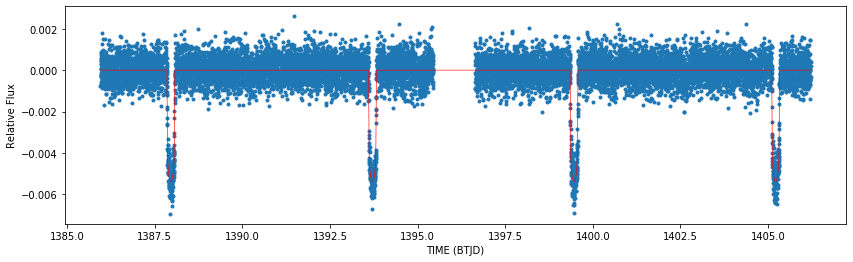

In [82]:
detrend = data['LC_DETREND']
model = data['MODEL_INIT']
time = data['TIME']

plt.figure(figsize=(14,4))
plt.plot(time,detrend,'.',lw=0.4)
plt.plot(time,model,'r-',lw=0.6)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Relative Flux')

In [0]:
url = dvurl + str(ticid) + '/phaseplot/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)

In [84]:
display(HTML(str(r.content.decode('utf-8'))))

Now we are gonna look at the star WASP 130 and its planet WASP-130 b

In [85]:
planet_name = "WASP-130 b"

url = planeturl + "/identifiers/"

myparams = {"name":planet_name}

r = requests.get(url = url, params = myparams, headers = header)
print(r.headers.get('content-type'))

application/json; charset=UTF-8


In [86]:
planet_names = r.json()
ticid = planet_names['tessID']
tce = planet_names['tessTCE']
planet_names

{'canonicalName': 'WASP-130 b',
 'dec': -42.475273,
 'keplerID': None,
 'keplerTCE': None,
 'planetNames': [],
 'ra': 203.105988,
 'starName': 'WASP-130',
 'tessID': 243200602,
 'tessTCE': 'TCE_1'}

In [87]:
url = planeturl + planet_name + "/properties/"

r = requests.get(url = url, headers = header)

planet_prop = r.json()

print("Catalog 1: " + planet_prop[0]['catalog_name'])
print("Catalog 2: " + planet_prop[1]['catalog_name'])
planet_prop[0].keys()

print("WASP-18 b Properties")
print("Stellar Mass %f %s" % (planet_prop[0]['Ms'], planet_prop[0]['Ms_unit'] ) )
print("Planet Mass %f %s" % (planet_prop[0]['Mp'], planet_prop[0]['Mp_unit'] ) )
print("Planet Mass Reference: %s" % (planet_prop[0]['Mp_ref']))


Catalog 1: nexsci
Catalog 2: exoplanets.org
WASP-18 b Properties
Stellar Mass 1.040000 M_sun
Planet Mass 1.230000 M_Jupiter
Planet Mass Reference: Hellier et al. 2017


In [88]:
url = dvurl + str(ticid) + '/tces/'
myparams = {"tce" : tce}

r = requests.get(url = url, params = myparams, headers = header)
sectorInfo = r.json()

sectors = [x[:11] for x in sectorInfo["TCE"] if tce in x]
sectors

['s0011-s0011']

In [89]:
url = dvurl + str(ticid) + '/info/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tceInfo = r.json()
tceInfo.keys()
tceInfo['DV Data Header'].keys()

print("TIC: %s" % tceInfo['DV Primary Header']['OBJECT'])
print("Planet Radius: %f" % tceInfo['DV Data Header']['PRADIUS'])




TIC: TIC 243200602
Planet Radius: 10.152186


In [0]:
# Get The data
url = dvurl + str(ticid) + '/table/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tce_data = r.json()



In [91]:
data = p.DataFrame.from_dict(tce_data['data'])
data.columns

Index(['TICID', 'EXTNAME', 'TIME', 'TIMECORR', 'CADENCENO', 'PHASE', 'LC_INIT',
       'LC_INIT_ERR', 'LC_WHITE', 'LC_DETREND', 'MODEL_INIT', 'MODEL_WHITE',
       'DATE_OBS', 'TESSDatetime', 'SECTORS'],
      dtype='object')

Text(0, 0.5, 'Relative Flux')

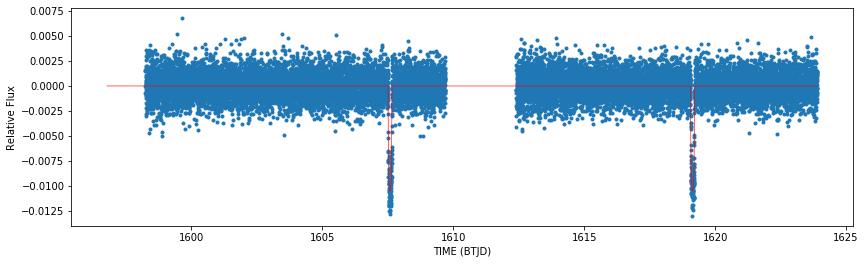

In [92]:
detrend = data['LC_DETREND']
model = data['MODEL_INIT']
time = data['TIME']

plt.figure(figsize=(14,4))
plt.plot(time,detrend,'.',lw=0.4)
plt.plot(time,model,'r-',lw=0.6)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Relative Flux')

In [0]:
url = dvurl + str(ticid) + '/phaseplot/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)

In [94]:
display(HTML(str(r.content.decode('utf-8'))))



---





### **Animation for WASP-130 b**




---





In [95]:
# For querying for data
!pip install astroquery
import requests
from astroquery.mast import Tesscut

# For manipulating data
import numpy as np

from astropy.table import Table
from astropy.coordinates import SkyCoord

import re

# For matplotlib plotting
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# For animation display
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')

# For bokeh plotting
from bokeh import plotting
plotting.output_notebook()

In [96]:
weird_tic_id = "243200602"
exomast_url = "https://exo.mast.stsci.edu/api/v0.1/"

list_tce_query = f"{exomast_url}dvdata/tess/{weird_tic_id}/tces/"
list_tce_query

response = requests.get(list_tce_query)
tce_dict = response.json()
print(tce_dict)

weird_sector, weird_tce = tce_dict['TCE'][0].split(":")

dv_metadata_query = f"{exomast_url}dvdata/tess/{weird_tic_id}/info/?tce={weird_tce}&sector={weird_sector}"
dv_metadata_query

response = requests.get(dv_metadata_query)
metadata = response.json()
metadata.keys()

metadata['DV Primary Header'].keys()

metadata['DV Data Header'].keys()

dv_lightcurve_query = f"{exomast_url}dvdata/tess/{weird_tic_id}/table/?tce={weird_tce}&sector={weird_sector}"
dv_lightcurve_query

response = requests.get(dv_lightcurve_query)
data_dict = response.json()
data_dict.keys()

for col in data_dict['fields']:
    print(f"{col['colname']} {col['datatype']:5} {col['description']}")

{'TCE': ['s0011-s0011:TCE_1']}
TIME                float  column title: data time stamps
TIMECORR            real   column title: barycenter - timeslice correction
CADENCENO           int    column title: unique cadence number
PHASE               real   column title: Phase using period and epoch
LC_INIT             real   column title: Detrended initial light curve (ga
LC_INIT_ERR         real   column title: Error in the detrended initial li
LC_WHITE            real   column title: Initial whitened time series fit
LC_DETREND          real   column title: Initial median detrended time ser
MODEL_INIT          real   column title: Model light curve
MODEL_WHITE         real   column title: Whitened model light curve


In [97]:
def json_to_table(fields, data):
    """"
    Takes a json object and turns it into an astropy table.

    Parameters
    ----------
    fields : list of dicts
        Of the form [{colname:,datatype:,description:}, ...]
    data : list of dicts
       Of the form [{col1:, col2:, ...},{col1:, col2:, ...}, ...]

    Returns
    -------
    response : `astropy.table.Table`
    """

    rx = re.compile(r"varchar\((\d+)\)")
    
    data_table = Table()

    for col, atype in [(x['colname'], x['datatype']) for x in fields]:
        col = col.strip()
        if "varchar" in atype:
            match = rx.search(atype)
            atype = "U" + match.group(1)
        if atype == "real":
            atype = "float"
        data_table[col] = np.array([x.get(col, None) for x in data], dtype=atype)

    return data_table

weird_lightcurve = json_to_table(data_dict['fields'],data_dict['data'])
    
weird_lightcurve

TIME,TIMECORR,CADENCENO,PHASE,LC_INIT,LC_INIT_ERR,LC_WHITE,LC_DETREND,MODEL_INIT,MODEL_WHITE
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
1596.7770052229887,0.004969646688550711,265908,0.7436517477035522,nan,nan,nan,nan,0.0,nan
1596.7783941155608,0.004969651345163584,265909,0.7450406551361084,nan,nan,nan,nan,0.0,nan
1596.7797830081402,0.0049696555361151695,265910,0.7464295625686646,nan,nan,nan,nan,0.0,nan
1596.781171900725,0.004969659727066755,265911,0.7478184700012207,nan,nan,nan,nan,0.0,nan
1596.782560793317,0.004969663918018341,265912,0.7492073178291321,nan,nan,nan,nan,0.0,nan
1596.7839496859174,0.004969668108969927,265913,0.7505962252616882,nan,nan,nan,nan,0.0,nan
1596.785338578524,0.0049696727655828,265914,0.7519851326942444,nan,nan,nan,nan,0.0,nan
1596.7867274711389,0.004969676956534386,265915,0.7533740401268005,nan,nan,nan,nan,0.0,nan
1596.78811636376,0.0049696811474859715,265916,0.7547628879547119,nan,nan,nan,nan,0.0,nan


Exploring light curve WASP 130 b

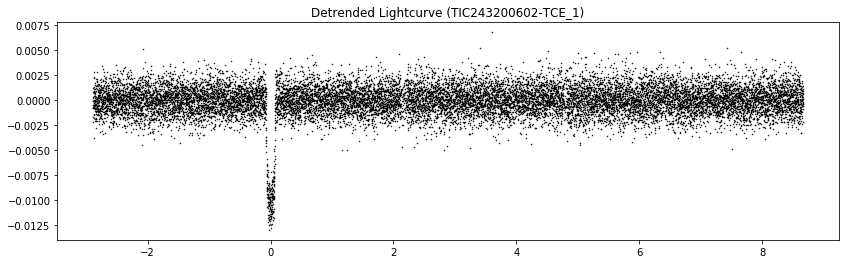

In [98]:
fig, ax = plt.subplots(figsize=(14,4))

# plotting the phased light curve
ax.plot(weird_lightcurve["PHASE"], weird_lightcurve['LC_DETREND'], 
        marker='.',linestyle='None', markersize=1, markerfacecolor='black', markeredgecolor="black") 
    
plt.title(f"Detrended Lightcurve (TIC{weird_tic_id}-{weird_tce})")            
plt.show(block=False)

bfig = plotting.figure(plot_width=850, plot_height=250, title=f"Detrended Lightcurve (TIC{weird_tic_id})")
bfig.circle(weird_lightcurve["PHASE"],weird_lightcurve["LC_DETREND"], fill_color="black",size=1, line_color=None)
plotting.show(bfig)

FFI cutout

In [99]:
ra = metadata['DV Data Header']['RA_OBJ']
dec = metadata['DV Data Header']['DEC_OBJ']
obj_coord = SkyCoord(ra,dec,unit="deg")
print(obj_coord)

Tesscut.get_sectors(obj_coord)

cutout_hdu = Tesscut.get_cutouts(obj_coord, size=50)[0]

cutout_hdu.info()

cutout_table = cutout_hdu[1].data
cutout_table.columns

<SkyCoord (ICRS): (ra, dec) in deg
    (203.10599, -42.475273)>
Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  PIXELS        1 BinTableHDU    280   1248R x 12C   [D, E, J, 2500J, 2500E, 2500E, 2500E, 2500E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        80   (50, 50)   int32   


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '2500J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(50, 50)'
    name = 'FLUX'; format = '2500E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(50, 50)'
    name = 'FLUX_ERR'; format = '2500E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(50, 50)'
    name = 'FLUX_BKG'; format = '2500E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(50, 50)'
    name = 'FLUX_BKG_ERR'; format = '2500E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(50, 50)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'FFI_FILE'; format = '38A'; unit = 'pixel'
)


Deciding which timeframe to look at

In [100]:
bfig = plotting.figure(plot_width=850, plot_height=250, title=f"Detrended Lightcurve (TIC{weird_tic_id})")
bfig.circle(weird_lightcurve["TIME"],weird_lightcurve["LC_DETREND"], fill_color="black",size=1, line_color=None)
plotting.show(bfig)

In [0]:
def find_index(btjd):
    """
    Given a time as a Barycentric TESS Julian Date (BTJD) timestamp, return the closest index in a table
    that is assumed to have a TIME column that is also in BTJD"""
    
    return (np.abs(cutout_table['TIME'] - btjd)).argmin()

In [102]:
start = find_index(1334)
end = find_index(1335)

print(f"Frames {start}-{end} ({end-start} frames)")

Frames 0-0 (0 frames)


In [0]:
def make_animation(data_array, start_frame=0, end_frame=None, vmin=None, vmax=None, delay=50):
    """
    Function that takes an array where each frame is a 2D image array and make an animated plot
    that runs through the frames.
    
    Note: This can take a long time to run if you have a lot of frames.    
    Parameters
    ----------
    data_array : array
        Array of 2D images.
    start_frame : int
        The index of the initial frame to show. Default is the first frame.
    end_frame : int
        The index of the final frame to show. Default is the last frame.
    vmin : float
        Data range min for the colormap. Defaults to data minimum value.
    vmax : float
        Data range max for the colormap. Defaults to data maximum value.
    delay: 
        Delay before the next frame is shown in milliseconds.

    Returns
    -------
    response : `animation.FuncAnimation`
    """
    
    if not vmin:
        vmin = np.min(data_array)
    if not vmax:
        vmax = np.max(data_array)
        
    if not end_frame:
        end_frame = len(data_array) - 1 # set to the end of the array
        
    num_frames = end_frame - start_frame + 1 # include the end frame
        
    def animate(i, fig, ax, binarytab, start=0):
        """Function used to update the animation"""
        ax.set_title("Epoch #" + str(i+start))
        im = ax.imshow(binarytab[i+start], cmap=plt.cm.YlGnBu_r, vmin=vmin, vmax=vmax)
        return im,
    
    # Create initial plot.
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(data_array[start_frame], cmap=plt.cm.YlGnBu_r, vmin=vmin, vmax=vmax)

    ani = animation.FuncAnimation(fig, animate, fargs=(fig, ax, data_array, start_frame), frames=num_frames, 
                                  interval=delay, repeat_delay=1000)
    
    plt.close()
    
    return ani

In [0]:

make_animation(cutout_table['FLUX'], start, end, vmax=500)